In [61]:
import os
import shutil
import random
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from keras.applications.vgg16 import preprocess_input, VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

## Challenge

Our objective is to determine whether the user is intoxicated. If the user is found to be drunk, the application will suggest a lighter beer, creating an automatic bias towards it. Conversely, if the user is sober, the application will not exhibit this bias, increasing the likelihood of the user selecting a higher ABV beer. To achieve accurate results, we require two datasets: one comprising data from intoxicated individuals and the other from sober individuals. Ensuring the absence of bias in these datasets is crucial for maintaining high accuracy.

## Sober images

```python
def create_dir_structure(base_dir, categories, split_names):
    for category in categories:
        for split in split_names:
            os.makedirs(os.path.join(base_dir, split, category), exist_ok=True)

def split_data(src_dir, categories, base_dir, test_size=0.2, val_size=0.1):
    train_dir = os.path.join(base_dir, 'train')
    test_dir = os.path.join(base_dir, 'test')
    val_dir = os.path.join(base_dir, 'val')
    
    create_dir_structure(base_dir, categories, ['train', 'test', 'val'])
    
    for category in categories:
        category_path = os.path.join(src_dir, category)
        images = os.listdir(category_path)
        
        train_and_val, val = train_test_split(images, test_size=test_size, random_state=42)
        train, test = train_test_split(train_and_val, test_size=val_size/(1-test_size), random_state=42)
        
        for split, split_dir in zip([train, test, val], [train_dir, test_dir, val_dir]):
            for image in split:
                src_image_path = os.path.join(category_path, image)
                dest_image_path = os.path.join(split_dir, category, image)
                shutil.copy(src_image_path, dest_image_path)
                
src_dir = 'D:\Documenten\Fontys\Software\Semester 6\Drunk face detection\Data\Male and Female face dataset'  # e.g., 'dataset'
categories = ['men', 'women']
base_dir = 'D:\Documenten\Fontys\Software\Semester 6\Drunk face detection\Data\Male and Female face dataset'  # e.g., 'split_dataset'

split_data(src_dir, categories, base_dir)
```

In [62]:
#def create_dir_structure(base_dir, categories, split_names):
#    for category in categories:
#        for split in split_names:
#            os.makedirs(os.path.join(base_dir, split, category), exist_ok=True)
#
#def split_data(src_dir, categories, base_dir, test_size=0.2, val_size=0.1):
#    train_dir = os.path.join(base_dir, 'train')
#    test_dir = os.path.join(base_dir, 'test')
#    val_dir = os.path.join(base_dir, 'val')
#    
#    create_dir_structure(base_dir, categories, ['train', 'test', 'val'])
#    
#    for category in categories:
#        category_path = os.path.join(src_dir, category)
#        images = os.listdir(category_path)
#        
#        train_and_val, val = train_test_split(images, test_size=test_size, random_state=42)
#        train, test = train_test_split(train_and_val, test_size=val_size/(1-test_size), random_state=42)
#        
#        for split, split_dir in zip([train, test, val], [train_dir, test_dir, val_dir]):
#            for image in split:
#                src_image_path = os.path.join(category_path, image)
#                dest_image_path = os.path.join(split_dir, category, image)
#                shutil.copy(src_image_path, dest_image_path)
#                
#src_dir = 'D:\Documenten\Fontys\Software\Semester 6\Drunk face detection\Data\Male and Female face dataset'  # e.g., 'dataset'
#categories = ['men', 'women']
#base_dir = 'D:\Documenten\Fontys\Software\Semester 6\Drunk face detection\Data\Male and Female face dataset'  # e.g., 'split_dataset'
#
#split_data(src_dir, categories, base_dir)

In [63]:
datagen = ImageDataGenerator(rescale=1.0/255.0)

In [64]:
BATCHSIZE = 64

In [65]:
print('train dataset:')
train_generator_sober = datagen.flow_from_directory(
    "Data/Male and Female face dataset/train",
    batch_size=BATCHSIZE,
    seed=10,
    class_mode="binary",
    shuffle=True)

print('\ntest dataset:')
test_generator_sober = datagen.flow_from_directory(
    "Data/Male and Female face dataset/test",
    batch_size=BATCHSIZE,
    seed=10,
    class_mode="binary",
    shuffle=False)

print('\nvalidation dataset:')
validation_generator_sober = datagen.flow_from_directory(
    "Data/Male and Female face dataset/val",
    batch_size=BATCHSIZE,
    seed=10,
    class_mode="binary")

train dataset:
Found 0 images belonging to 2 classes.

test dataset:
Found 0 images belonging to 2 classes.

validation dataset:
Found 0 images belonging to 2 classes.


Text(0, 0.5, 'Amount')

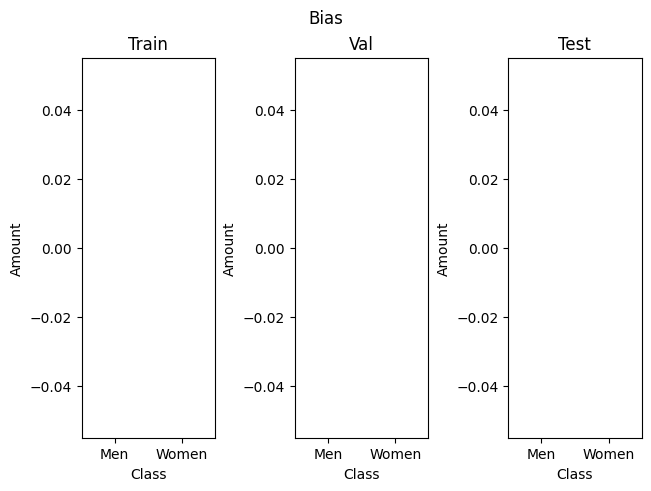

In [66]:
# Bias check Plot
fig, axs = plt.subplots(1,3, layout='constrained')
plt.suptitle('Bias')

axs[0].bar(
    'Men',
    np.sum(train_generator_sober.labels == 0)
)
axs[0].bar(
    'Women',
    np.sum(train_generator_sober.labels == 1)
)
axs[0].set_title('Train')
axs[0].set_xlabel('Class')
axs[0].set_ylabel('Amount')

axs[1].bar(
    'Men',
    np.sum(validation_generator_sober.labels == 0)
)
axs[1].bar(
    'Women',
    np.sum(validation_generator_sober.labels == 1)
)
axs[1].set_title('Val')
axs[1].set_xlabel('Class')
axs[1].set_ylabel('Amount')


axs[2].bar(
    'Men',
    np.sum(test_generator_sober.labels == 0)
)
axs[2].bar(
    'Women',
    np.sum(test_generator_sober.labels == 1)
)
axs[2].set_title('Test')
axs[2].set_xlabel('Class')
axs[2].set_ylabel('Amount')

## Drunk dataset

```python
def create_dir_structure(base_dir, categories, split_names):
    for category in categories:
        for split in split_names:
            os.makedirs(os.path.join(base_dir, split, category), exist_ok=True)

def split_data(src_dir, categories, base_dir, test_size=0.2, val_size=0.1):
    train_dir = os.path.join(base_dir, 'train')
    test_dir = os.path.join(base_dir, 'test')
    val_dir = os.path.join(base_dir, 'val')
    
    create_dir_structure(base_dir, categories, ['train', 'test', 'val'])

    for category in categories:
        category_path = os.path.join(src_dir, category)
        images = os.listdir(category_path)
        
        train_and_val, val = train_test_split(images, test_size=test_size, random_state=42)
        train, test = train_test_split(train_and_val, test_size=val_size/(1-test_size), random_state=42)
        
        for split, split_dir in zip([train, test, val], [train_dir, test_dir, val_dir]):
            for image in split:
                src_image_path = os.path.join(category_path, image)
                dest_image_path = os.path.join(split_dir, category, image)
                shutil.copy(src_image_path, dest_image_path)

src_dir = 'D:\Documenten\Fontys\Software\Semester 6\Drunk face detection\Data\imagesDrunk'  # e.g., 'dataset'
categories = ['drunk']
base_dir = 'D:\Documenten\Fontys\Software\Semester 6\Drunk face detection\Data\imagesDrunk'  # e.g., 'split_dataset'

split_data(src_dir, categories, base_dir)

In [67]:
#def create_dir_structure(base_dir, categories, split_names):
#    for category in categories:
#        for split in split_names:
#            os.makedirs(os.path.join(base_dir, split, category), exist_ok=True)
#
#def split_data(src_dir, categories, base_dir, test_size=0.2, val_size=0.1):
#    train_dir = os.path.join(base_dir, 'train')
#    test_dir = os.path.join(base_dir, 'test')
#    val_dir = os.path.join(base_dir, 'val')
#    
#    create_dir_structure(base_dir, categories, ['train', 'test', 'val'])
#
#    for category in categories:
#        category_path = os.path.join(src_dir, category)
#        images = os.listdir(category_path)
#        
#        train_and_val, val = train_test_split(images, test_size=test_size, random_state=42)
#        train, test = train_test_split(train_and_val, test_size=val_size/(1-test_size), random_state=42)
#        
#        for split, split_dir in zip([train, test, val], [train_dir, test_dir, val_dir]):
#            for image in split:
#                src_image_path = os.path.join(category_path, image)
#                dest_image_path = os.path.join(split_dir, category, image)
#                shutil.copy(src_image_path, dest_image_path)
#
#src_dir = 'D:\Documenten\Fontys\Software\Semester 6\Drunk face detection\Data\imagesDrunk'  # e.g., 'dataset'
#categories = ['drunk']
#base_dir = 'D:\Documenten\Fontys\Software\Semester 6\Drunk face detection\Data\imagesDrunk'  # e.g., 'split_dataset'
#
#split_data(src_dir, categories, base_dir)

In [68]:
print('train dataset:')
train_generator_drunk = datagen.flow_from_directory(
    "Data/imagesDrunk/train",
    batch_size=BATCHSIZE,
    seed=10,
    class_mode="binary",
    shuffle=False)

print('\ntest dataset:')
test_generator_drunk = datagen.flow_from_directory(
    "Data/imagesDrunk/test",
    batch_size=BATCHSIZE,
    seed=10,
    class_mode="binary",
    shuffle=False)

print('\nvalidation dataset:')
validation_generator_drunk = datagen.flow_from_directory(
    "Data/imagesDrunk/val",
    batch_size=BATCHSIZE,
    seed=10,
    class_mode="binary",
    shuffle=False)

train dataset:
Found 3454 images belonging to 2 classes.

test dataset:
Found 495 images belonging to 2 classes.

validation dataset:
Found 988 images belonging to 2 classes.


Text(0, 0.5, 'Amount')

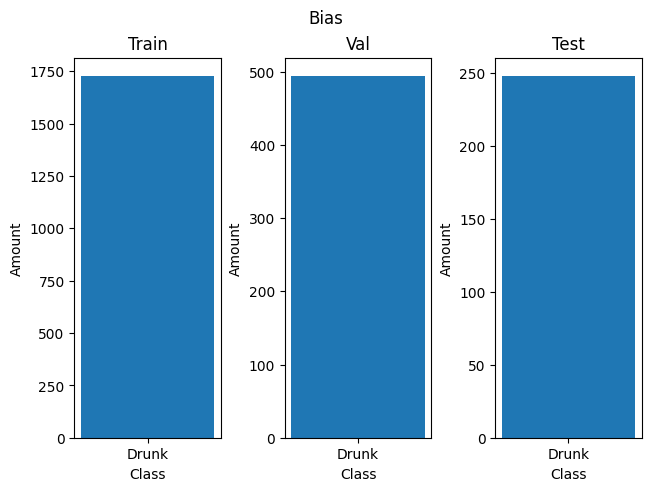

In [69]:
# Bias check Plot
fig, axs = plt.subplots(1,3, layout='constrained')
plt.suptitle('Bias')

axs[0].bar(
    'Drunk',
    np.sum(train_generator_drunk.labels == 1)
)
axs[0].set_title('Train')
axs[0].set_xlabel('Class')
axs[0].set_ylabel('Amount')

axs[1].bar(
    'Drunk',
    np.sum(validation_generator_drunk.labels == 1)
)
axs[1].set_title('Val')
axs[1].set_xlabel('Class')
axs[1].set_ylabel('Amount')


axs[2].bar(
    'Drunk',
    np.sum(test_generator_drunk.labels == 1)
)
axs[2].set_title('Test')
axs[2].set_xlabel('Class')
axs[2].set_ylabel('Amount')

## Merging datasets

Upon examining the bar plots, it is evident that the dataset for drunk individuals has the least amount of data available. To address this, I propose augmenting the drunk dataset with an equal number of sober faces for each subset. It is essential to ensure that the added data includes an equal number of male and female faces to maintain balance and accuracy in the dataset.

In [70]:
#def copy_images(src_folder, dest_folder, num_images):
#    """
#    Copies a specified number of images from the source folder to the destination folder.
#    """
#    # Get list of all files in the source folder
#    all_files = [f for f in os.listdir(src_folder) if os.path.isfile(os.path.join(src_folder, f))]
#    
#    # Randomly select the specified number of files
#    selected_files = random.sample(all_files, num_images)
#    
#    # Copy the selected files to the destination folder
#    for file_name in selected_files:
#        shutil.copy(os.path.join(src_folder, file_name), os.path.join(dest_folder, file_name))
#
#base_dir = f'Data/Male and Female face dataset'  # Replace with the path to your image folder
#new_base_dir = 'Data/imagesDrunk'  # Replace with the path to your new image folder
#
## Subfolders in the base directory
#subfolders = ['train', 'test', 'val']
#categories = ['men', 'women']
#
## Loop through each subfolder and category
#for subfolder in subfolders:
#    if subfolder == 'train':
#        num_images = round(np.sum(train_generator_drunk.labels == 0) / 2)
#    elif subfolder == 'val':
#        num_images = round(np.sum(validation_generator_drunk.labels == 0) / 2)
#    elif subfolder == 'test':
#        num_images = round(np.sum(test_generator_drunk.labels == 0) / 2)
#    else:
#        raise ValueError("Invalid subset provided.")
#    
#    dest_folder = os.path.join(new_base_dir, subfolder, 'sober')
#    # Ensure the destination folder exists
#    os.makedirs(dest_folder)
#
#    for category in categories:
#        src_folder = os.path.join(base_dir, subfolder, category)
#        # Calculate the number of images based on your condition
#        copy_images(src_folder=src_folder, 
#                    dest_folder=dest_folder, 
#                    num_images=num_images)

In [71]:
# Create generators
train_generator = datagen.flow_from_directory('Data/imagesDrunk/train', 
                                              class_mode='binary',
                                              seed=10,
                                              shuffle=True,
                                              batch_size = BATCHSIZE,
                                              target_size = (256, 256))

validation_generator = datagen.flow_from_directory('Data/imagesDrunk/val', 
                                                   class_mode='binary',
                                                   seed=10,
                                                   batch_size = BATCHSIZE,
                                                   target_size = (256, 256))

test_generator = datagen.flow_from_directory('Data/imagesDrunk/test', 
                                             class_mode='binary',
                                             seed=10,
                                             shuffle=False,
                                             batch_size = BATCHSIZE,
                                             target_size = (256, 256))

Found 3454 images belonging to 2 classes.
Found 988 images belonging to 2 classes.
Found 495 images belonging to 2 classes.


Train labels sober: 1727
Train labels drunk: 1727
Val labels sober: 494
Val labels drunk: 494
Test labels sober: 247
Test labels drunk: 248


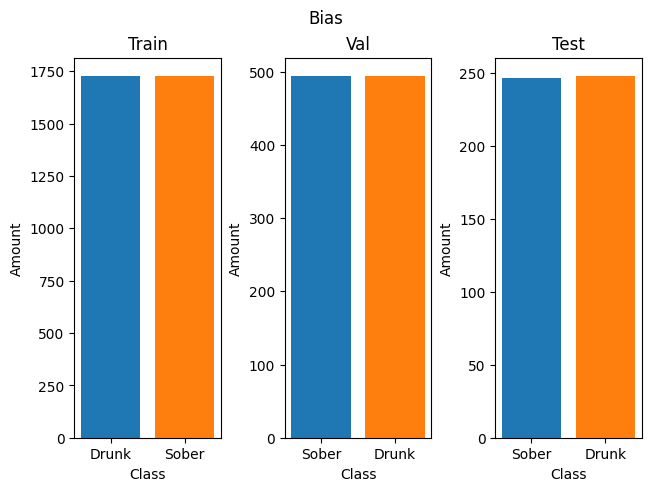

In [72]:
# Bias check Plot
fig, axs = plt.subplots(1,3, layout='constrained')
plt.suptitle('Bias')

axs[0].bar(
    'Drunk',
    np.sum(train_generator.labels == 0)
)
axs[0].bar(
    'Sober',
    np.sum(train_generator.labels == 1)
)
axs[0].set_title('Train')
axs[0].set_xlabel('Class')
axs[0].set_ylabel('Amount')

axs[1].bar(
    'Sober',
    np.sum(validation_generator.labels == 0)
)
axs[1].bar(
    'Drunk',
    np.sum(validation_generator.labels == 1)
)
axs[1].set_title('Val')
axs[1].set_xlabel('Class')
axs[1].set_ylabel('Amount')


axs[2].bar(
    'Sober',
    np.sum(test_generator.labels == 0)
)
axs[2].bar(
    'Drunk',
    np.sum(test_generator.labels == 1)
)
axs[2].set_title('Test')
axs[2].set_xlabel('Class')
axs[2].set_ylabel('Amount')

print('Train labels sober:', np.sum(train_generator.labels == 0))
print('Train labels drunk:', np.sum(train_generator.labels == 1))

print('Val labels sober:', np.sum(validation_generator.labels == 0))
print('Val labels drunk:', np.sum(validation_generator.labels == 1))

print('Test labels sober:', np.sum(test_generator.labels == 0))
print('Test labels drunk:', np.sum(test_generator.labels == 1))

In [112]:
train_generator[0][1][2]

1.0

In [123]:
imgs = [0, 32]
ncols = 0

fig, axs = plt.subplots(nrows=1, ncols=2)

for img in imgs:
    axs[1, ncols].imshow(train_generator[img][0][0])

    if train_generator[img][1][0] == 0.0:
        axs[1, ncols].suptitle('Drunk')
    else:
        axs[1, ncols].suptitle('Sober')
    ncols += 1

TypeError: subplot() got an unexpected keyword argument 'ncols' and/or 'nrows'.  Did you intend to call subplots()?

## Model

In [74]:
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, Input
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
import warnings

In [75]:
# Load the VGG16 model with pretrained weights and without the top fully connected layers
base_model = VGG16(include_top=False, 
                   input_shape=(256, 256, 3))

# Freeze the base model
base_model.trainable = False

In [76]:
# Create a new input layer
inputs = Input(shape=(256, 256, 3))

# Pass the inputs through the base model
x = base_model(inputs, training=False)

# Add custom layers on top of the base model
x = Conv2D(32, (3, 3), activation='relu')(x)
x = MaxPooling2D((2, 2))(x)
x = Dropout(0.25)(x)

x = Conv2D(64, (3, 3), activation='relu')(x)
x = Dropout(0.25)(x)

x = Flatten()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)

outputs = Dense(1, activation='sigmoid')(x)

In [77]:
# Create the new model
model = Model(inputs, outputs)

# Print the model summary
model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ vgg16 (Functional)              │ (None, 8, 8, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 6, 6, 32)       │       147,488 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 3, 3, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 3, 3, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 1, 1, 64)       │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 1, 1, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │        33,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,914,465 (56.89 MB)

 Trainable params: 199,777 (780.38 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [78]:
model.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

In [79]:
# Define the EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_accuracy',
                               min_delta = 0.0005,
                               patience=2)

In [80]:
history = model.fit(train_generator,
                    epochs=3,
                    validation_data=validation_generator,
                    batch_size=BATCHSIZE,
                    callbacks=[early_stopping])

Epoch 1/3


c:\Users\tijnd\anaconda3\envs\Brewgle\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


54/54 ━━━━━━━━━━━━━━━━━━━━ 418s 8s/step - accuracy: 0.7800 - loss: 0.4444 - val_accuracy: 0.9464 - val_loss: 0.1581
Epoch 2/3
54/54 ━━━━━━━━━━━━━━━━━━━━ 409s 8s/step - accuracy: 0.9444 - loss: 0.1426 - val_accuracy: 0.9595 - val_loss: 0.1042
Epoch 3/3
54/54 ━━━━━━━━━━━━━━━━━━━━ 405s 7s/step - accuracy: 0.9623 - loss: 0.1027 - val_accuracy: 0.9575 - val_loss: 0.1111


In [81]:
# Model Evaluation
test_loss, test_acc = model.evaluate(test_generator)
print(f'Model:\n   Test Loss: {test_loss}, Test Accuracy: {test_acc}\n')

8/8 ━━━━━━━━━━━━━━━━━━━━ 46s 6s/step - accuracy: 0.9298 - loss: 0.1736
Model:
   Test Loss: 0.16918312013149261, Test Accuracy: 0.9434343576431274



In [82]:
#model = load_model('Trained_models\h5\modelv0.5.h5')

## Visuals

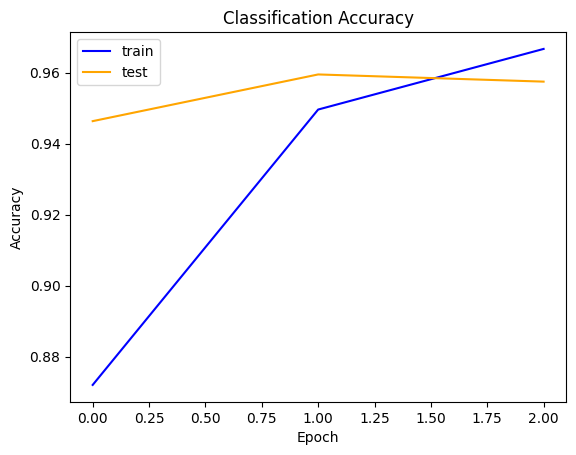

In [83]:
# plot accuracy
plt.title('Classification Accuracy')
plt.plot(history.history['accuracy'], color='blue', label='train')
plt.plot(history.history['val_accuracy'], color='orange', label='test')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.show()

In [84]:
predictions = model.predict(test_generator)

8/8 ━━━━━━━━━━━━━━━━━━━━ 47s 6s/step


predicted_classes: 495
true_classes: 495
predicted_classes: [[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]


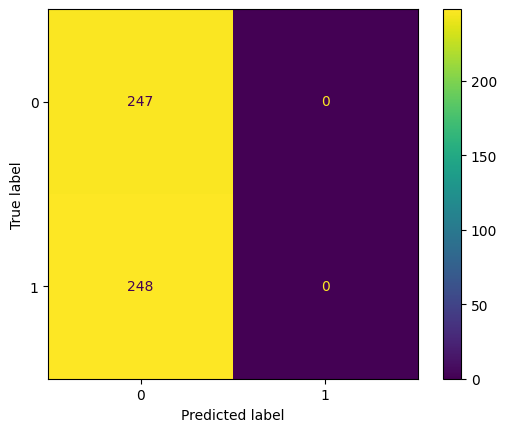

In [85]:
true_classes = test_generator.classes
predicted_classes = predictions.astype(int)

print('predicted_classes:', len(predicted_classes))
print('true_classes:', len(true_classes))
print('predicted_classes:', predicted_classes)
print('true_classes:', true_classes)

# Create the confusion matrix
confusionMatrix = confusion_matrix(y_true=true_classes, y_pred=predicted_classes)

# Display the confusion matrix
confusionMatrixDisp = ConfusionMatrixDisplay(confusion_matrix=confusionMatrix)
confusionMatrixDisp.plot()

In [102]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(true_classes, predicted_classes)
recall = recall_score(true_classes, predicted_classes)
f1 = f1_score(true_classes, predicted_classes)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Precision: 0.0
Recall: 0.0
F1 Score: 0.0


c:\Users\tijnd\anaconda3\envs\Brewgle\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [96]:
indexes = []
for i in range(len(true_classes)):
    if predicted_classes[i] == true_classes[i] and true_classes[i] == 1:
        indexes.append(i)

In [97]:
print(indexes)

[]


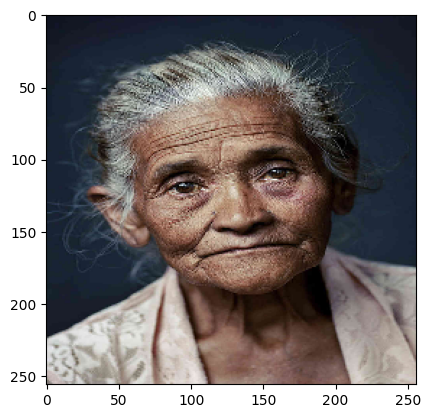

In [98]:
for image_index in indexes:
    # Calculate batch number and index within the batch
    batch_number = image_index // BATCHSIZE
    index_in_batch = image_index % BATCHSIZE

    # Initialize a counter to keep track of batches
    batch_counter = 0

    # Iterate through the generator to find the batch containing the desired image
    for batch in test_generator:
        if batch_counter == batch_number:
            # Extract the image from the batch
            image = batch[0][index_in_batch]  # batch[0] contains the images, batch[1] contains labels if present
            break
        batch_counter += 1

plt.imshow(image)

In [99]:
indexes_wrong = []
for i in range(len(true_classes)):
    if predicted_classes[i] != true_classes[i] and true_classes[i] == 1:
        indexes_wrong.append(i)

In [100]:
print(indexes_wrong)

[247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325, 326, 327, 328, 329, 330, 331, 332, 333, 334, 335, 336, 337, 338, 339, 340, 341, 342, 343, 344, 345, 346, 347, 348, 349, 350, 351, 352, 353, 354, 355, 356, 357, 358, 359, 360, 361, 362, 363, 364, 365, 366, 367, 368, 369, 370, 371, 372, 373, 374, 375, 376, 377, 378, 379, 380, 381, 382, 383, 384, 385, 386, 387, 388, 389, 390, 391, 392, 393, 394, 395, 396, 397, 398, 399, 400, 401, 402, 403, 404, 405, 406, 407, 408, 409, 410, 411, 412, 413, 414, 415, 416, 417, 418, 419, 420, 421, 422, 423, 424, 425, 426, 427, 428, 429, 430, 431, 432, 433, 434, 435, 436, 437, 438, 439, 440, 441, 442, 443, 444, 445, 446,

In [101]:
for image_index in indexes_wrong:
    # Calculate batch number and index within the batch
    batch_number = image_index // BATCHSIZE
    index_in_batch = image_index % BATCHSIZE

    # Initialize a counter to keep track of batches
    batch_counter = 0

    # Iterate through the generator to find the batch containing the desired image
    for batch in test_generator:
        if batch_counter == batch_number:
            # Extract the image from the batch
            image = batch[0][index_in_batch]  # batch[0] contains the images, batch[1] contains labels if present
            break
        batch_counter += 1

plt.imshow(image)

IndexError: index 56 is out of bounds for axis 0 with size 47

In [ ]:
#name = 'modelv0.7'
#
#if not os.path.exists(os.path.join('Trained_models/h5/', f'{name}.h5')):
#    model.save(f'Trained_models/h5/{name}.h5')
#    print('Model saved as .h5 file')
#else:
#    warnings.warn(f'Model with name: {name}.h5, already exists. Skipped saving model')
#
#if not os.path.exists(os.path.join('Trained_models/keras', f'{name}.keras')):
#    model.save(f'Trained_models/keras/{name}.keras')
#    print('Model saved as .keras file')
#else:
#    warnings.warn(f'Model with name: {name}.keras, already exists. Skipped saving model')